# HOG

In [42]:
import cv2
import matplotlib.pyplot as plt
import scipy
import numpy as np

# image = cv2.imread('train/pos/per00060.ppm', cv2.IMREAD_GRAYSCALE)
# plt.imshow(image, 'gray')

# def gradients_2(img):

#     dims = None
#     magnitude = np.zeros_like(img)
#     Gx = np.zeros_like(img)
#     Gy = np.zeros_like(img)
#     if len(img.shape) == 3: #bgr
#         dims = 3
#     else: #gray
#         dims = 1 
#     for dim in range(dims):
#         im = img #gray
#         if dims == 3: #bgr
#             im = img[:, :, dim]

#         dx = scipy.ndimage.filters.convolve1d(np.int32(im), np.array([-1, 0, 1]), 1)
#         dy = scipy.ndimage.filters.convolve1d(np.int32(im), np.array([-1, 0, 1]), 0)
#         mag = np.sqrt(dx**2 + dy**2)

#         if dims == 3: #bgr
#             Gx[:, :, dim] = dx
#             Gy[:, :, dim] = dy
#             magnitude[:, :, dim] = mag
#         else: #gray
#             Gx = dx
#             Gy = dy
#             magnitude = mag
    
#     mag_max = np.zeros((img.shape[0], img.shape[1])) #final m
#     theta = np.zeros((img.shape[0], img.shape[1])) #final gradient direcion

#     if dims == 1: #gray
#         mag_max = magnitude
#         theta = np.arctan2(Gy, Gx)
#     elif dims == 3: #bgr
#         max_B = np.logical_and(magnitude[:, :, 1] < magnitude[:, :, 0], magnitude
#                             [:, :, 2] < magnitude[:, :, 0])
#         max_G = np.logical_and(magnitude[:, :, 0] < magnitude[:, :, 1], magnitude
#                             [:, :, 2] < magnitude[:, :, 1])
#         max_R = np.logical_and(magnitude[:, :, 0] < magnitude[:, :, 2], magnitude
#                             [:, :, 1] < magnitude[:, :, 2])
        
#         mag_max[max_B] = magnitude[:, :, 0][max_B]
#         mag_max[max_G] = magnitude[:, :, 1][max_G]
#         mag_max[max_R] = magnitude[:, :, 2][max_R]

#         Gx_max = np.zeros_like(mag_max)
#         Gx_max[max_B] = Gx[:, :, 0][max_B]
#         Gx_max[max_G] = Gx[:, :, 1][max_G]
#         Gx_max[max_R] = Gx[:, :, 2][max_R]

#         Gy_max = np.zeros_like(mag_max)
#         Gy_max[max_B] = Gy[:, :, 0][max_B]
#         Gy_max[max_G] = Gy[:, :, 1][max_G]
#         Gy_max[max_R] = Gy[:, :, 2][max_R]


#         theta = np.arctan2(Gy_max, Gx_max)
#         theta = np.degrees(theta)
#         # theta %= 180

#     return mag_max, theta

# def create_gradients(img):  
#     dx = scipy.ndimage.convolve1d(np.int32(img), np.array([-1, 0, 1]),1) 
#     dy = scipy.ndimage.convolve1d(np.int32(img), np.array([-1, 0, 1]),0)
    
#     magnitude = np.sqrt(dx**2 + dy**2)
#     argmax_magnitude = None
#     if len(magnitude.shape) == 3:
#         argmax_magnitude = np.argmax(magnitude, axis=2)
#         magnitude = np.max(magnitude, axis=2)
        
#     angle = np.arctan2(dy, dx)
#     if len(angle.shape) == 3:
#         angle = angle[:,:,argmax_magnitude]
        
#     return magnitude, angle

In [43]:
# def histogram(mag, theta, img):
#     cellSize = 8
#     YY, XX = img.shape[:2]
#     YY_cell=np.int32(YY/cellSize)
#     XX_cell=np.int32(XX/cellSize)
#     mids = np.array([x for x in range(10, 180, 20)])
#     hists = np.zeros((YY_cell, XX_cell, mids.size))

#     for y in range(0, img.shape[0], YY_cell):
#         for x in range(0, img.shape[1], XX_cell):
            
#             mag_cell = mag[y:y+cellSize, x:x+cellSize]
#             theta_cell = theta[y:y+cellSize, x:x+cellSize]
#             for i in range(theta_cell.shape[0]):
#                 for j in range(theta_cell.shape[1]):
#                     curr_theta = theta_cell[i, j]
#                     curr_mag = mag_cell[i, j]

#                     diff = np.abs(curr_theta - mids)

#                     if curr_theta < mids[0]:
#                         first_bin_idx = 0
#                         second_bin_idx = mids.size-1
#                     elif curr_theta > mids[-1]:
#                         first_bin_idx = mids.size-1
#                         second_bin_idx = 0
#                     else:
#                         first_bin_idx = np.where(diff == np.min(diff))[0][0]
#                         temp = mids[[(first_bin_idx-1)%mids.size, (first_bin_idx+1)%mids.size]]
#                         temp2 = np.abs(curr_theta - temp)
#                         res = np.where(temp2 == np.min(temp2))[0][0]
#                         if res == 0 and first_bin_idx != 0:
#                             second_bin_idx = first_bin_idx - 1
#                         else:
#                             second_bin_idx = first_bin_idx + 1
                    
#                     first_bin_value = mids[first_bin_idx]
#                     second_bin_value = mids[second_bin_idx]

#                     y_cur = y // YY_cell
#                     x_cur = x // XX_cell
#                     hists[y_cur, x_cur, first_bin_idx] += (np.abs(curr_theta - first_bin_value)/(180.0/mids.size)) * curr_mag
#                     hists[y_cur, x_cur, second_bin_idx] += (np.abs(curr_theta - second_bin_value)/(180.0/mids.size)) * curr_mag


#     return hists

# def create_histogram(magnitude, angle, cell_size=8, bin_size=20):
#     bins = int(180 / bin_size)
#     histogram = np.zeros((int(magnitude.shape[0]/cell_size), int(magnitude.shape[1]/cell_size), bins))
    
#     for i in range(0, magnitude.shape[0], cell_size):
#         for j in range(0, magnitude.shape[1], cell_size):
#             for x in range(i, i+cell_size):
#                 for y in range(j, j+cell_size):
#                     if angle[x, y] < 0:
#                         angle[x, y] += np.pi
#                     degree = np.rad2deg(angle[x, y])
                    
#                     bin_index = int((degree % 180) / bin_size)
#                     bin_center = bin_index * bin_size + bin_size / 2
#                     if degree < bin_center:
#                         lower_bin_index = ((bin_index - 1) + bins) % bins
#                         upper_bin_index = bin_index
#                     else:
#                         lower_bin_index = bin_index
#                         upper_bin_index = (bin_index + 1) % bins
#                     lower_bin_fi = degree - (lower_bin_index * bin_size + bin_size / 2)
#                     upper_bin_fi = (upper_bin_index * bin_size + bin_size / 2) - degree
                    
#                     if lower_bin_fi < 0:
#                         lower_bin_fi += 180
#                     if upper_bin_fi < 0:
#                         upper_bin_fi += 180
                        
#                     upper_bin_weight = lower_bin_fi / bin_size
#                     lower_bin_weight = upper_bin_fi / bin_size
                    
#                     histogram[int(i/cell_size), int(j/cell_size), lower_bin_index] += magnitude[x, y] * lower_bin_weight
#                     histogram[int(i/cell_size), int(j/cell_size), upper_bin_index] += magnitude[x, y] * upper_bin_weight
#     return histogram

# histogram = create_histogram(magnitude, angle)

In [44]:
def get_gradients_gray(im):
    dx = scipy.ndimage.convolve1d(np.int32(im), np.array([-1, 0, 1]), axis=1)
    dy = scipy.ndimage.convolve1d(np.int32(im), np.array([-1, 0, 1]), axis=0)

    magnitude = np.sqrt(dx**2 + dy**2)
    orientation = np.arctan2(dy, dx)

    orientation = np.rad2deg(orientation)
    orientation = orientation % 180
    orientation[orientation < 0] += 180

    return magnitude, orientation

def get_gradients_rgb(im):
    dx = np.stack([scipy.ndimage.convolve1d(np.int32(im[:, :, i]), 
                                            np.array([-1, 0, 1]), axis=1) for i in range(3)], axis=2)
    dy = np.stack([scipy.ndimage.convolve1d(np.int32(im[:, :, i]), 
                                            np.array([-1, 0, 1]), axis=0) for i in range(3)], axis=2)

    magnitude = np.sqrt(dx**2 + dy**2)
    
    maxR = (magnitude[:, :, 0] >= magnitude[:, :, 1]) & (magnitude[:, :, 0] >= magnitude[:, :, 2])
    maxG = (magnitude[:, :, 1] > magnitude[:, :, 0]) & (magnitude[:, :, 1] >= magnitude[:, :, 2])
    maxB = (magnitude[:, :, 2] > magnitude[:, :, 0]) & (magnitude[:, :, 2] > magnitude[:, :, 1])

    max_mag = np.zeros_like(magnitude[:, :, 0])
    max_mag[maxR] = magnitude[maxR, 0]
    max_mag[maxG] = magnitude[maxG, 1]
    max_mag[maxB] = magnitude[maxB, 2]

    orientation = np.arctan2(dy, dx)
    
    max_ori = np.zeros_like(orientation[:, :, 0])
    max_ori[maxR] = np.rad2deg(orientation[maxR, 0])
    max_ori[maxG] = np.rad2deg(orientation[maxG, 1])
    max_ori[maxB] = np.rad2deg(orientation[maxB, 2])

    max_ori = max_ori % 180

    return max_mag, max_ori

def get_gradients(im):
    if len(im.shape) == 2:
        return get_gradients_gray(im)
    else:
        return get_gradients_rgb(im)

In [45]:
def get_hog(magnitude, orientation, cell_size=8, num_bins=9):
    height, width = magnitude.shape
    YY_cell, XX_cell = height // cell_size, width // cell_size
    
    histogram = np.zeros((YY_cell, XX_cell, num_bins))
    
    bin_width = 180 / num_bins
    bin_centers = np.linspace(bin_width / 2, 180 - bin_width / 2, num_bins)
    
    for i in range(YY_cell):
        for j in range(XX_cell):
            window_mag = magnitude[i*cell_size:(i+1)*cell_size, j*cell_size:(j+1)*cell_size]
            window_ori = orientation[i*cell_size:(i+1)*cell_size, j*cell_size:(j+1)*cell_size]
            
            for y in range(cell_size):
                for x in range(cell_size):
                    angle = window_ori[y, x]
                    mag = window_mag[y, x]

                    bin_idx = int(angle // bin_width)
                    lower_bin = bin_idx
                    upper_bin = (bin_idx + 1) % num_bins
                    lower_center = bin_centers[lower_bin]
                    upper_center = bin_centers[upper_bin] if bin_idx + 1 < num_bins else 190

                    # v_UB = mag * (angle - lower_center) / bin_width
                    # v_LB = mag * (upper_center - angle) / bin_width
                    
                    histogram[i, j, lower_bin] += mag * (angle - lower_center) / bin_width
                    histogram[i, j, upper_bin] += mag * (upper_center - angle) / bin_width
    
    return histogram

# histogram = get_hog(magnitude, orientation)

In [46]:
import math

# def normalize_hists(hist):
#     e = math.pow(1e-5, 2)
#     F = []
#     for i in range(hist.shape[0]-1):
#         for j in range(hist.shape[1]-1):
#             H0 = hist[i, j, :]
#             H1 = hist[i, j+1, :]
#             H2 = hist[i+1, j, :]
#             H3 = hist[i+1, j+1, :]
#             H = np.concatenate((H0, H1, H2, H3))
#             n = np.linalg.norm(H)
#             Hn = H/np.sqrt(math.pow(n, 2)+e)
#             F = np.concatenate((F, Hn))
#     return F

def norm_hists(histogram):

    epsilon=(1e-5)**2
    YY_cell, XX_cell, _ = histogram.shape
    norm_hog = []
    
    for j in range(YY_cell - 1):
        for i in range(XX_cell - 1):
            block_hist = np.concatenate((
                histogram[j, i, :],
                histogram[j, i+1, :],
                histogram[j+1, i, :],
                histogram[j+1, i+1, :]
            ))
            norm = np.linalg.norm(block_hist)
            norm_hist = block_hist / np.sqrt(norm**2 + epsilon)
            norm_hog.append(norm_hist)
    
    return np.concatenate(norm_hog)

In [47]:
# def hog(img):
#     magnitude, angle = create_gradients(img)
#     histogram = create_histogram(magnitude, angle)
#     normalized_histogram = normalize_hists(histogram)
#     return normalized_histogram
def hog(im):
    magnitude, orientation = get_gradients(im)
    histogram = get_hog(magnitude, orientation)
    feature_vector = norm_hists(histogram)
    return feature_vector

In [48]:
# import skimage as ski

def HOGpicture(hists, cellSize=8):
    bim1 = np.zeros((cellSize, cellSize))
    bim1[np.round(cellSize//2):np.round(cellSize//2)+1, :] = 1
    bim = np.zeros(bim1.shape+(9,))
    bim[:, :, 0] = bim1
    for i in range(0, 9):
        bim[:, :, i] = scipy.misc.imrotate(bim1, -i*20, 'nearest')/255
        # bim[:, :, i] = ski.transform.rotate(bim1, -i*20)/255
    Y, X, Z = hists.shape
    hists[hists < 0] = 0
    im = np.zeros((cellSize*Y, cellSize*X)) 
    for i in range(Y):
        iisl = (i)*cellSize
        iisu = (i+1)*cellSize
        for j in range(X):
            jjsl = j*cellSize
            jjsu = (j+1)*cellSize
            for k in range(9):
                im[iisl:iisu, jjsl:jjsu] += bim[:, :, k] * hists[i, j, k]
    return im

# hog_image = HOGpicture(histogram, 8)
# plt.imshow(hog_image, 'gray')

# SVM

In [75]:
max_range = 100
HOG_data = np.zeros([2*max_range, 3781], np.float32)

for i in range(max_range):
    IP = cv2.imread('train/pos/per%05d.ppm' % (i + 1))
    IN = cv2.imread('train/neg/neg%05d.png' % (i + 1))
    F_p = hog(IP)
    HOG_data[i, 0] = 1
    HOG_data[i, 1:] = F_p
    F_n = hog(IN)
    HOG_data[i + max_range, 0] = 0
    HOG_data[i + max_range, 1:] = F_n

In [76]:
from sklearn import svm

labels = HOG_data[:, 0]
data = HOG_data[:, 1:]

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(data, labels)

SVC(kernel='linear')

In [77]:
lp = clf.predict(data)

In [78]:
def show_metrics(lp, labels):
    TP = np.count_nonzero(np.bitwise_and(lp == 1, labels == 1))
    TN = np.count_nonzero(np.bitwise_and(lp == 0, labels == 0))
    FP = np.count_nonzero(np.bitwise_and(lp == 1, labels == 0))
    FN = np.count_nonzero(np.bitwise_and(lp == 0, labels == 1))
    print(f'TP: {TP}\nTN: {TN}\nFP: {FP}\nFN: {FN}')
    print(f'Accuracy: {(TP+TN)/len(lp)}')

show_metrics(lp, labels)

TP: 100
TN: 100
FP: 0
FN: 0
Accuracy: 1.0


In [79]:
HOG_data_test = np.zeros([2*100, 3781], np.float32)

for i in range (100, 200):
    IP = cv2.imread ('train/pos/per%05d.ppm' % (i + 1))
    IN = cv2.imread ('train/neg/neg%05d.png' % (i + 1))
    F = hog(IP)
    HOG_data_test[i-100, 0] = 1
    HOG_data_test[i-100, 1:] = F
    F = hog(IN)
    HOG_data_test[i, 0] = 0
    HOG_data_test[i, 1:] = F

test_labels = HOG_data_test[:, 0]
test_data = HOG_data_test[:, 1:]
test_predicts = clf.predict(test_data)

show_metrics(test_predicts, test_labels)

TP: 100
TN: 100
FP: 0
FN: 0
Accuracy: 1.0


# FINAL DETECTOR

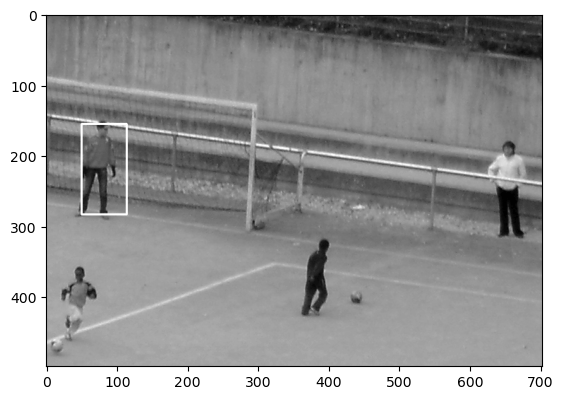

In [80]:
img = cv2.imread('test/testImage1.png', cv2.IMREAD_GRAYSCALE)
pp = (50, 155)
cv2.rectangle(img, pp, (pp[0] + 64, pp[1] + 128), (255, 0, 0), 2)
plt.imshow(img, 'gray')

In [55]:
# SCALER = 1.2

# def pyramid(img, max_scale=3):
#     images = [img]
#     for k in range(1, max_scale):
#         images.append(cv2.resize(images[k-1], (0, 0), fx=1/SCALER, fy=1/SCALER))
#     return images

In [56]:
# YY, XX = 128, 64
# def find_rec_one(img):
#     result_images = {}
#     best_score = 0

#     for y in range(0, img.shape[0] - YY, 8):
#         for x in range(0, img.shape[1] - XX, 8):
#             window = I_test[y:y+YY, x:x+XX]
#             F = hog(window)
#             F = F.reshape(1, -1)
#             score = clf.decision_function(F)
#             prediction = clf.predict(F)
#             if prediction == 1:
#                 if score > best_score:
#                     best_score = score
#                 I_test_copy = img.copy()
#                 I_test_copy = cv2.rectangle(I_test_copy, (x, y), (x + XX, y + YY), (255, 0, 0), 1)
#                 result_images[score] = I_test_copy
#                 # # print(score[0])
#                 # result_images[score[0]] = (x, y)
#     return result_images[best_score[0]]

# def find_multiple_scale(img):
#     img_list = pyramid(img, 3)
#     I_final = img.copy()
#     best_coords = []
#     for im in img_list:
#         print(im.shape)
#         best_coords.append(find_rec_one(im))
    
#     for i, (x, y) in enumerate(best_coords):
#         x_2 = x*(SCALER**i)
#         y_2 = y*(SCALER**i)
#         I_final = cv2.rectangle(I_final, (x_2, y_2), (x_2 + XX, y_2 + YY), (255, 0, 0), 1)
#     return I_final



# def find_rec_multiple(img):
#     I_test_copy = img.copy()
#     for y in range(0, img.shape[0] - YY, 8):
#         for x in range(0, img.shape[1] - XX, 8):
#             window = I_test[y:y+YY, x:x+XX]
#             F = hog(window)
#             F = F.reshape(1, -1)
#             prediction = clf.predict(F)
#             if prediction == 1:
#                 I_test_copy = cv2.rectangle(I_test_copy, (x, y), (x + XX, y + YY), (255, 0, 0), 1)
#     return I_test_copy
# # plt.imshow(I_test_copy, 'gray')
        

In [57]:
# from imutils.object_detection import non_max_suppression

# def pyramid(image, scale=1.5, min_size=(128, 128)):
#     yield image
#     while True:
#         w = int(image.shape[1] / scale)
#         image = cv2.resize(image, (w, int(image.shape[0] / scale)))
#         if image.shape[0] < min_size[1] or image.shape[1] < min_size[0]:
#             break
#         yield image

# def detect(img, step=16, scale=1):
#     img_cpy = img.copy()
#     height, width = img.shape[:2]
#     H, W = 128, 64
#     detections = []

#     for y in range(0, height - H, step):
#         for x in range(0, width - W, step):
#             window = img_cpy[y:y+H, x:x+W]
#             F = hog(window)
#             prediction = clf.predict([F])
#             if prediction == 1:
#                 x, y = int(x*scale), int(y*scale)
#                 detections.append((x, y, int(W*scale), int(H*scale)))
    
#     return detections

# def draw_rects(img, rects):
#     for (x, y, w, h) in rects:
#         cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
#     return img

# def detect_person(img, scale=1.5, step=16):
#     img_cpy = img.copy()
#     detections = []
#     for i, img_res in enumerate(pyramid(img_cpy)):
#         cur_scale = scale**i
#         boxes = detect(img_res, step, cur_scale)
#         if len(boxes) > 0:
#             detections.append(boxes)

#     detections = np.array([item for sublist in detections for item in sublist])
#     choices = non_max_suppression(detections, overlapThresh=0.3)

#     final_boxes = []
#     for i in range(len(choices)):
#         x1, y1, x2, y2 = choices[i]
#         inside_other = any((x1 >= x1a and y1 >= y1a and x2 <= x2a and y2 <= y2a) for j, (x1a, y1a, x2a, y2a) in enumerate(choices) if i != j)
#         if not inside_other:
#             final_boxes.append(choices[i])

#         img_cpy = draw_rects(img_cpy, final_boxes)
#         return img_cpy

In [113]:
def detect_pyramid(im, step=16, scale=1):
    im_cp = im.copy()
    h, w = im_cp.shape[:2]
    sw_h, sw_w = 128, 64
    detectoins = []

    for y in range(0, h - sw_h, step):
        for x in range(0, w - sw_w, step):
            window = im_cp[y:y+sw_h, x:x+sw_w]
            F = hog(window)
            prediction = clf.predict([F])
            if prediction == 1:
                x, y = int(x * scale), int(y * scale)
                detectoins.append((x, y, int(sw_w*scale), int(sw_h*scale)))
                # cv2.rectangle(org_img, (x, y), (x + int(sw_w*scale), y + int(sw_h*scale)), (0, 255, 0), 2)
    return detectoins

def pyramid(image, scale=1.5, min_size=(128, 128)):
    yield image
    while True:
        w = int(image.shape[1] / scale)
        image = cv2.resize(image, (w, int(image.shape[0] / scale)))
        if image.shape[0] < min_size[1] or image.shape[1] < min_size[0]:
            break
        yield image

def draw_rectangles(image, rects, color=(0, 0, 255), thickness=2):
    for (x, y, w, h) in rects:
        cv2.rectangle(image, (x, y), (x + w, y + h), color, thickness)
    return image

from imutils.object_detection import non_max_suppression

def detect_person(img, scale=1.5, step=16):
    img_cp = img.copy()
    detections = []
    for i, resized in enumerate(pyramid(img_cp)):
        cur_scale = scale**i
        boxes = detect_pyramid(resized, step=step, scale=cur_scale)
        if boxes != []:
            detections.append(boxes)
    detections = np.array([item for sublist in detections for item in sublist])
    pick = non_max_suppression(detections, overlapThresh=0.3)
    
    to_delete = []
    for i in range(len(pick)):
        x1, y1, x2, y2 = pick[i]
        # inside_other = any((x1 >= x1a and y1 >= y1a and x2 <= x2a and y2 <= y2a) for j, (x1a, y1a, x2a, y2a) in enumerate(pick) if i != j)
        # inside_other = any((x1 < x1a + x2a and x1 + x2 > x1a and y1 < y1a + y2a and y1 + y2 > y1a) for j, (x1a, y1a, x2a, y2a) in enumerate(pick) if i != j)
        for j, (x1a, y1a, x2a, y2a) in enumerate(pick):
            if i != j:
                if x1 < x1a + x2a and x1 + x2 > x1a and y1 < y1a + y2a and y1 + y2 > y1a:
                    smaller = pick[i] if x2*y2 < x2a*y2a else pick[j]
                    smaller = smaller.tolist()
                    if smaller not in to_delete:
                        to_delete.append(smaller)

        # if not overlap:
        #     final_boxes.append(pick[i])
        # else:
        #     final_pick = pick[i] if x2*y2 > x2a*y2a else pick[j]
        #     final_boxes.append(final_pick)
    print(to_delete)
    pick_list = pick.tolist()
    print(pick_list)
    for p in to_delete:
        pick_list.remove(p)
        # index = np.argwhere(pick == p)
        # pick = np.delete(pick, index)

    img_cp = draw_rectangles(img_cp, pick_list)
    return img_cp

[[96, 0, 64, 128]]
[[24, 120, 96, 192], [352, 304, 64, 128], [256, 64, 64, 128], [96, 0, 64, 128]]


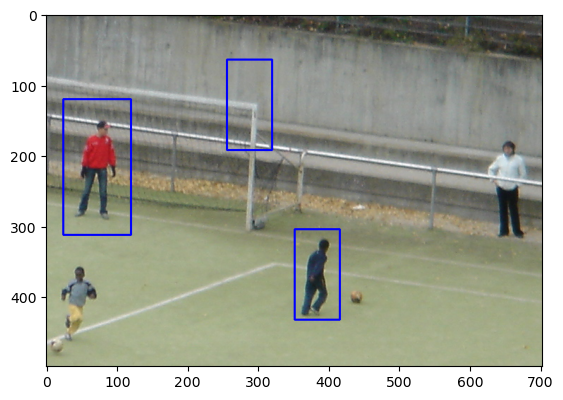

In [114]:
test1 = cv2.imread('test/testImage1.png')
test1 = cv2.cvtColor(test1, cv2.COLOR_BGR2RGB)
plt.imshow(detect_person(test1))

In [ ]:
# test2 = cv2.imread('test/testImage2.png')
# test2 = cv2.cvtColor(test2, cv2.COLOR_BGR2RGB)
# plt.imshow(detect_person(test2))

[]
[[80, 16, 64, 128]]


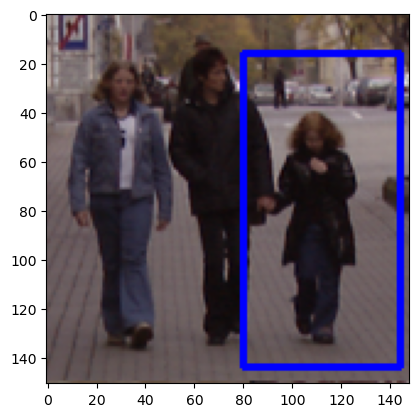

In [115]:
test3 = cv2.imread('test/testImage3.png')
test3 = cv2.cvtColor(test3, cv2.COLOR_BGR2RGB)
plt.imshow(detect_person(test3))

[[192, 144, 64, 128]]
[[180, 72, 144, 288], [192, 144, 64, 128], [16, 32, 64, 128]]


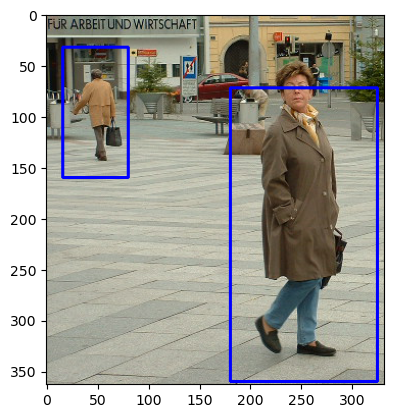

In [116]:
test4 = cv2.imread('test/testImage4.png')
test4 = cv2.cvtColor(test4, cv2.COLOR_BGR2RGB)
plt.imshow(detect_person(test4))